# Heart Diseases - Machine Learning

## Selección de Proyecto

### Motivación

En mi caso personal, fue debido a la no conformidad con mi proyecto anterior que exploré la posibilidad de indagar en otros sectores (como la salud, en este caso) para poder aplicar los principales algoritmos expuestos a lo largo de las clases.

### Objetivo

Reflejar los conocimientos adquiridos a lo largo del curso a través de la aplicación de algoritmos de Machine Learning destinados a la clasificación binaria, con el propósito de detectar qué personas, en base a ciertas condiciones, tuvieron una cardiopatía.

### Planteamiento del problema

#### Contexto

De acuerdo con Lapp D. (2019), quien fue el que proporcionó a Kaggle el dataset usado a lo largo de este proyecto, los datos se remontan a 1988 y proviene de pacientes 4 lugares con 76 atributos, pero el presente está limitado a únicamente 14, a través de los cuáles se exponen ciertas condiciones de aquellos pacientes que han presentado, o no, una cardiopatía.

https://www.kaggle.com/johnsmith88/heart-disease-dataset

#### Problemática

La problemática consiste en que no se cuenta con un algoritmo que permita predecir la presencia de una cardiopatía en función de las características que se estudian para conocer la salud del paciente. Gracias a un conjunto de datos históricos, en los que además de las condiciones posteriormente enunciadas, se incluyó un campo en el que se registró la presencia de una cardiopatía. De esta manera, se procederá a evaluar un conjunto de algoritmos para determinar cuál es el más óptimo para clasificar a los pacientes en un criterio binario (presentará o no una cardiopatía).

#### Uso de Machine Learning

En este apartado de expondrá el por qué es justificable el uso de Machine Learning en el presente proyecto. De acuerdo con Encora (2020), la importancia del uso de Machine Learning en el ámbito médico es trascendental, pues gracias a la recolección de inmensaas cantidades de datos, se ha podido aplicar en problemáticas muy similares a la anteriormente descrita: la clasificación y predicción de posibles pacientes con cáncer de mama o el alzhaimer. Es importante, a su vez, destacar que la aplicación de Machine Learning trasciende el caso del presente proyecto, pues se ha aplicado sobre datos no estructurados, como en el procesamiento de imágenes de rayos X (para las personas con cáncer, por ejemplo), etc.

https://www.encora.com/es/blog/machine-learning-aplicado-al-diagnostico-medico

### Librerías

In [289]:
# Análisis de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

### Funciones

In [130]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad
    
def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))
    
    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc.round(2))+"%")
    print("Sensibilidad:"+str(sen.round(2))+"%")
    print("Especificidad:"+str(spec.round(2))+"%")

## Data Analysis (EDA)

### Limpieza de BBDD y tipos de datos

In [191]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Descripción de las columnas

#### Nombres de las columnas

Age = Edad    

Sex = Sexo (1 = Hombre, 0 = Mujer)                                            

Cp = Tipo de dolor de pecho               

Trestbps = Presión arterial en reposo                 

Chol = Colesterol sérico en mg/dl                     

Fbs = Glucemia en ayunas                              

Restecg = Resultados electrocardiográficos en reposo

Thalach = Frecuencia cardíaca máxima alcanzada

Exang = Angina inducida por ejercicio

Oldpeak = Depresión del ST inducida por el ejercicio en relación con el descanso

Slope = La pendiente del segmento ST de ejercicio pico

Ca = Número de vasos importantes

Thal = 0 = normal; 1 = defecto fijo; 2 = defecto reversible

Target = 0 = no tiene cardiopatía; 1 = tiene cardiopatía

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Valores únicos de edad (age)
len(np.unique(df['age']))

41

In [8]:
# Valores únicos de sexo (sex)
len(np.unique(df['sex']))

2

In [9]:
# Valores únicos de tipo de color de pecho (cp)
len(np.unique(df['cp']))

4

In [10]:
# # Valores únicos de presión arterial en reposo (trestbps)
len(np.unique(df['trestbps']))

49

In [11]:
# Valores únicos de colesterol sérico (chol)
len(np.unique(df['chol']))

152

In [12]:
# Valores únicos de glucemia en ayunas (fbs)
len(np.unique(df['fbs']))

2

In [13]:
# Valores únicos de resultados electrocardiográficos en reposo (restecg)
len(np.unique(df['restecg']))

3

In [14]:
# Valores únicos de la frecuencia cardíaca máxima alcanzada (thalach)
len(np.unique(df['thalach']))

91

In [15]:
# Valores únicos de angina inducida por ejercicio (exang)
len(np.unique(df['exang']))

2

In [16]:
# Valores únicos de depresión del ST inducida por el ejercicio en relación con el descanso (oldpeak)
len(np.unique(df['oldpeak']))

40

In [17]:
# Valores únicos de la pendiente del segmento ST de ejercicio pico (slope)
len(np.unique(df['slope']))

3

In [18]:
# Valores únicos de número de vasos importantes (ca)
len(np.unique(df['ca']))

5

In [19]:
# Valores únicos de 0 = normal; 1 = defecto fijo; 2 = defecto reversible (thal)
len(np.unique(df['thal']))

4

In [20]:
# Valores únicos de 0 = no tiene cardiopatía; 1 = tiene cardiopatía (target)
len(np.unique(df['target']))

2

### Análisis exploratorio

#### Medidas de tendencia central

In [21]:
# Edad (Age)
print(f"La media es: {round(df['age'].mean(), 2)}")
print(f"La mediana es: {df['age'].median()}")
print(f"La moda es: {df['age'].mode()}")

La media es: 54.43
La mediana es: 56.0
La moda es: 0    58
dtype: int64


In [22]:
# Sexo (Sex)
print(f"La media es: {round(df['sex'].mean(), 2)}")
print(f"La mediana es: {df['sex'].median()}")
print(f"La moda es: {df['sex'].mode()}")

La media es: 0.7
La mediana es: 1.0
La moda es: 0    1
dtype: int64


In [23]:
# Tipo de dolor de pecho (Cp)
print(f"La media es: {round(df['cp'].mean(), 2)}")
print(f"La mediana es: {df['cp'].median()}")
print(f"La moda es: {df['cp'].mode()}")

La media es: 0.94
La mediana es: 1.0
La moda es: 0    0
dtype: int64


In [24]:
# Presión arterial en reposo (Trestbps)
print(f"La media es: {round(df['trestbps'].mean(), 2)}")
print(f"La mediana es: {df['trestbps'].median()}")
print(f"La moda es: {df['trestbps'].mode()}")

La media es: 131.61
La mediana es: 130.0
La moda es: 0    120
dtype: int64


In [25]:
# Colesterol sérico en mg/dl (Chol)
print(f"La media es: {round(df['chol'].mean(), 2)}")
print(f"La mediana es: {df['chol'].median()}")
print(f"La moda es: {df['chol'].mode()}")

La media es: 246.0
La mediana es: 240.0
La moda es: 0    204
1    234
dtype: int64


In [26]:
# Glucemia en ayunas (Fbs)
print(f"La media es: {round(df['fbs'].mean(), 2)}")
print(f"La mediana es: {df['fbs'].median()}")
print(f"La moda es: {df['fbs'].mode()}")

La media es: 0.15
La mediana es: 0.0
La moda es: 0    0
dtype: int64


In [27]:
# Resultados electrocardiográficos en reposo (Restecg)
print(f"La media es: {round(df['restecg'].mean(), 2)}")
print(f"La mediana es: {df['restecg'].median()}")
print(f"La moda es: {df['restecg'].mode()}")

La media es: 0.53
La mediana es: 1.0
La moda es: 0    1
dtype: int64


In [28]:
# Frecuencia cardíaca máxima alcanzada (Thalach)
print(f"La media es: {round(df['thalach'].mean(), 2)}")
print(f"La mediana es: {df['thalach'].median()}")
print(f"La moda es: {df['thalach'].mode()}")

La media es: 149.11
La mediana es: 152.0
La moda es: 0    162
dtype: int64


In [29]:
# Angina inducida por ejercicio (Exang)
print(f"La media es: {round(df['exang'].mean(), 2)}")
print(f"La mediana es: {df['exang'].median()}")
print(f"La moda es: {df['exang'].mode()}")

La media es: 0.34
La mediana es: 0.0
La moda es: 0    0
dtype: int64


In [30]:
# Depresión del ST inducida por el ejercicio en relación con el descanso (Oldpeak)
print(f"La media es: {round(df['oldpeak'].mean(), 2)}")
print(f"La mediana es: {df['oldpeak'].median()}")
print(f"La moda es: {df['oldpeak'].mode()}")

La media es: 1.07
La mediana es: 0.8
La moda es: 0    0.0
dtype: float64


In [31]:
# La pendiente del segmento ST de ejercicio pico (Slope)
print(f"La media es: {round(df['slope'].mean(), 2)}")
print(f"La mediana es: {df['slope'].median()}")
print(f"La moda es: {df['slope'].mode()}")

La media es: 1.39
La mediana es: 1.0
La moda es: 0    1
dtype: int64


In [32]:
# Número de vasos importantes (Ca)
print(f"La media es: {round(df['ca'].mean(), 2)}")
print(f"La mediana es: {df['ca'].median()}")
print(f"La moda es: {df['ca'].mode()}")

La media es: 0.75
La mediana es: 0.0
La moda es: 0    0
dtype: int64


In [33]:
# 0 = normal; 1 = defecto fijo; 2 = defecto reversible (Thal)
print(f"La media es: {round(df['thal'].mean(), 2)}")
print(f"La mediana es: {df['thal'].median()}")
print(f"La moda es: {df['thal'].mode()}")

La media es: 2.32
La mediana es: 2.0
La moda es: 0    2
dtype: int64


In [34]:
# 0 = no tiene cardiopatía; 1 = tiene cardiopatía (Target)
print(f"La media es: {round(df['target'].mean(), 2)}")
print(f"La mediana es: {df['target'].median()}")
print(f"La moda es: {df['target'].mode()}")

La media es: 0.51
La mediana es: 1.0
La moda es: 0    1
dtype: int64


#### Medidas de dispersión

In [35]:
# Edad (Age)
maximo_age = df['age'].max()
minimo_age = df['age'].min()

print(f"El valor máximo es: {maximo_age}")
print(f"El valor mínimo es: {minimo_age}")
print(f"El rango es: {maximo_age - minimo_age}")
print(f"La desviación estándar es: {round(df['age'].std(), 2)}")

El valor máximo es: 77
El valor mínimo es: 29
El rango es: 48
La desviación estándar es: 9.07


In [36]:
# Sexo (Sex)
maximo_sex = df['sex'].max()
minimo_sex = df['sex'].min()

print(f"El valor máximo es: {maximo_sex}")
print(f"El valor mínimo es: {minimo_sex}")
print(f"El rango es: {maximo_sex - minimo_sex}")
print(f"La desviación estándar es: {round(df['sex'].std(), 2)}")

El valor máximo es: 1
El valor mínimo es: 0
El rango es: 1
La desviación estándar es: 0.46


In [37]:
# Tipo de dolor de pecho (Cp)
maximo_cp = df['cp'].max()
minimo_cp = df['cp'].min()

print(f"El valor máximo es: {maximo_cp}")
print(f"El valor mínimo es: {minimo_cp}")
print(f"El rango es: {maximo_cp - minimo_cp}")
print(f"La desviación estándar es: {round(df['cp'].std(), 2)}")

El valor máximo es: 3
El valor mínimo es: 0
El rango es: 3
La desviación estándar es: 1.03


In [38]:
# Presión arterial en reposo (Trestbps)
maximo_trestbps = df['trestbps'].max()
minimo_trestbps = df['trestbps'].min()

print(f"El valor máximo es: {maximo_trestbps}")
print(f"El valor mínimo es: {minimo_trestbps}")
print(f"El rango es: {maximo_trestbps - minimo_trestbps}")
print(f"La desviación estándar es: {round(df['trestbps'].std(), 2)}")

El valor máximo es: 200
El valor mínimo es: 94
El rango es: 106
La desviación estándar es: 17.52


In [39]:
# Colesterol sérico en mg/dl (Chol)
maximo_chol = df['chol'].max()
minimo_chol = df['chol'].min()

print(f"El valor máximo es: {maximo_chol}")
print(f"El valor mínimo es: {minimo_chol}")
print(f"El rango es: {maximo_chol - minimo_chol}")
print(f"La desviación estándar es: {round(df['chol'].std(), 2)}")

El valor máximo es: 564
El valor mínimo es: 126
El rango es: 438
La desviación estándar es: 51.59


In [40]:
# Glucemia en ayunas (Fbs)
maximo_fbs = df['fbs'].max()
minimo_fbs = df['fbs'].min()

print(f"El valor máximo es: {maximo_fbs}")
print(f"El valor mínimo es: {minimo_fbs}")
print(f"El rango es: {maximo_fbs - minimo_fbs}")
print(f"La desviación estándar es: {round(df['fbs'].std(), 2)}")

El valor máximo es: 1
El valor mínimo es: 0
El rango es: 1
La desviación estándar es: 0.36


In [41]:
# Resultados electrocardiográficos en reposo (Restecg)
maximo_restecg = df['restecg'].max()
minimo_restecg = df['restecg'].min()

print(f"El valor máximo es: {maximo_restecg}")
print(f"El valor mínimo es: {minimo_restecg}")
print(f"El rango es: {maximo_restecg - minimo_restecg}")
print(f"La desviación estándar es: {round(df['restecg'].std(), 2)}")

El valor máximo es: 2
El valor mínimo es: 0
El rango es: 2
La desviación estándar es: 0.53


In [42]:
# Frecuencia cardíaca máxima alcanzada (Thalach)
maximo_thalach = df['thalach'].max()
minimo_thalach = df['thalach'].min()

print(f"El valor máximo es: {maximo_thalach}")
print(f"El valor mínimo es: {minimo_thalach}")
print(f"El rango es: {maximo_thalach - minimo_thalach}")
print(f"La desviación estándar es: {round(df['thalach'].std(), 2)}")

El valor máximo es: 202
El valor mínimo es: 71
El rango es: 131
La desviación estándar es: 23.01


In [43]:
# Angina inducida por ejercicio (Exang)
maximo_exang = df['exang'].max()
minimo_exang = df['exang'].min()

print(f"El valor máximo es: {maximo_exang}")
print(f"El valor mínimo es: {minimo_exang}")
print(f"El rango es: {maximo_exang - minimo_exang}")
print(f"La desviación estándar es: {round(df['exang'].std(), 2)}")

El valor máximo es: 1
El valor mínimo es: 0
El rango es: 1
La desviación estándar es: 0.47


In [44]:
# Depresión del ST inducida por el ejercicio en relación con el descanso (Oldpeak)
maximo_oldpeak = df['oldpeak'].max()
minimo_oldpeak = df['oldpeak'].min()

print(f"El valor máximo es: {maximo_oldpeak}")
print(f"El valor mínimo es: {minimo_oldpeak}")
print(f"El rango es: {maximo_oldpeak - minimo_oldpeak}")
print(f"La desviación estándar es: {round(df['oldpeak'].std(), 2)}")

El valor máximo es: 6.2
El valor mínimo es: 0.0
El rango es: 6.2
La desviación estándar es: 1.18


In [45]:
# La pendiente del segmento ST de ejercicio pico (Slope)
maximo_slope = df['slope'].max()
minimo_slope = df['slope'].min()

print(f"El valor máximo es: {maximo_slope}")
print(f"El valor mínimo es: {minimo_slope}")
print(f"El rango es: {maximo_slope - minimo_slope}")
print(f"La desviación estándar es: {round(df['slope'].std(), 2)}")

El valor máximo es: 2
El valor mínimo es: 0
El rango es: 2
La desviación estándar es: 0.62


In [46]:
# Número de vasos importantes (Ca)
maximo_ca = df['ca'].max()
minimo_ca = df['ca'].min()

print(f"El valor máximo es: {maximo_ca}")
print(f"El valor mínimo es: {minimo_ca}")
print(f"El rango es: {maximo_ca - minimo_ca}")
print(f"La desviación estándar es: {round(df['ca'].std(), 2)}")

El valor máximo es: 4
El valor mínimo es: 0
El rango es: 4
La desviación estándar es: 1.03


In [47]:
# 0 = normal; 1 = defecto fijo; 2 = defecto reversible (Thal)
maximo_thal = df['thal'].max()
minimo_thal = df['thal'].min()

print(f"El valor máximo es: {maximo_thal}")
print(f"El valor mínimo es: {minimo_thal}")
print(f"El rango es: {maximo_thal - minimo_thal}")
print(f"La desviación estándar es: {round(df['thal'].std(), 2)}")

El valor máximo es: 3
El valor mínimo es: 0
El rango es: 3
La desviación estándar es: 0.62


In [48]:
# 0 = no tiene cardiopatía; 1 = tiene cardiopatía (Target)
maximo_target = df['target'].max()
minimo_target = df['target'].min()

print(f"El valor máximo es: {maximo_target}")
print(f"El valor mínimo es: {minimo_target}")
print(f"El rango es: {maximo_target - minimo_target}")
print(f"La desviación estándar es: {round(df['target'].std(), 2)}")

El valor máximo es: 1
El valor mínimo es: 0
El rango es: 1
La desviación estándar es: 0.5


#### Visualizaciones

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


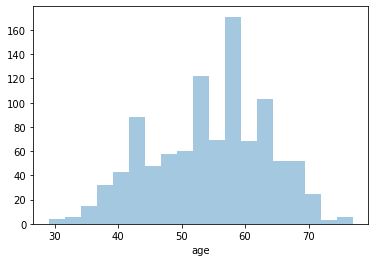

In [49]:
# Edad (Age)
ax = sns.distplot(df['age'], kde = False, norm_hist=False)

In [50]:
# Sexo (Sex)
sexo = df['sex'].value_counts()
sexo

1    713
0    312
Name: sex, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


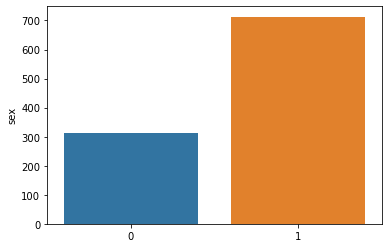

In [51]:
# Gráfica de barras de sexo
ax = sns.barplot(sexo.index, sexo)

In [52]:
# Tipo de dolor de pecho (Cp)
cp = df['cp'].value_counts()
cp

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


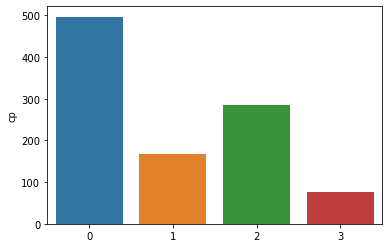

In [53]:
# Gráfica de barras de tipo de dolor de pecho
ax = sns.barplot(cp.index, cp)

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


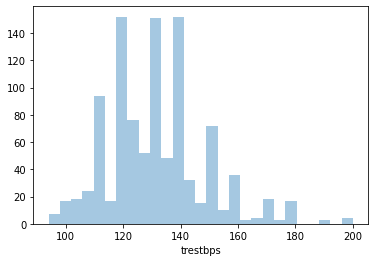

In [54]:
# Presión arterial en reposo (Trestbps)
ax = sns.distplot(df['trestbps'], kde = False, norm_hist=False)

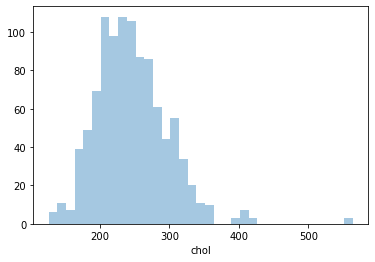

In [55]:
# Colesterol sérico en mg/dl (Chol)
ax = sns.distplot(df['chol'], kde = False, norm_hist=False)

In [56]:
# Glucemia en ayunas (Fbs)
fbs = df['fbs'].value_counts()
fbs

0    872
1    153
Name: fbs, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


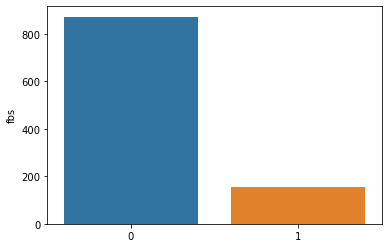

In [57]:
# Gráfica de barras de glucemia en ayunas
ax = sns.barplot(fbs.index, fbs)

In [58]:
# Resultados electrocardiográficos en reposo (Restecg)
restecg = df['restecg'].value_counts()
restecg

1    513
0    497
2     15
Name: restecg, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


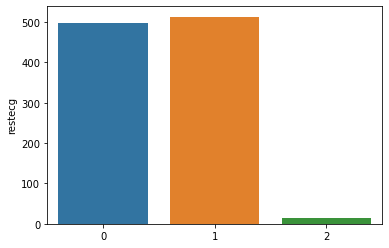

In [59]:
# Gráfica de barras de resultados electrocardiográficos en reposo
ax = sns.barplot(restecg.index, restecg)

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


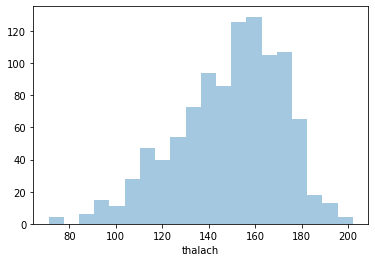

In [60]:
# Frecuencia cardíaca máxima alcanzada (Thalach)
ax = sns.distplot(df['thalach'], kde = False, norm_hist=False)

In [61]:
# Angina inducida por ejercicio (Exang)
exang = df['exang'].value_counts()
exang

0    680
1    345
Name: exang, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


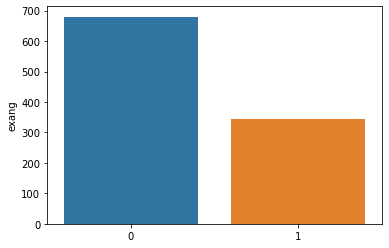

In [62]:
# Gráfica de barras de angina inducida por ejercicio
ax = sns.barplot(exang.index, exang)

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


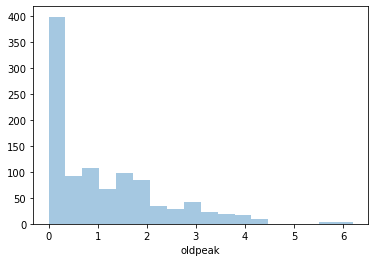

In [63]:
# Depresión del ST inducida por el ejercicio en relación con el descanso (Oldpeak)
ax = sns.distplot(df['oldpeak'], kde = False, norm_hist=False)

In [64]:
# La pendiente del segmento ST de ejercicio pico (Slope)
slope = df['slope'].value_counts()
slope

1    482
2    469
0     74
Name: slope, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


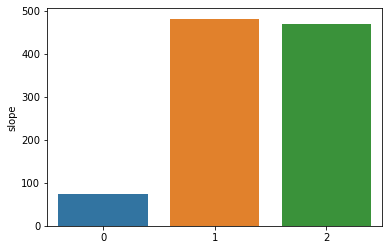

In [65]:
# Gráfica de barras de la pendiente del segmento ST de ejercicio pico
ax = sns.barplot(slope.index, slope)

In [66]:
# Número de vasos importantes (Ca)
ca = df['ca'].value_counts()
ca

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


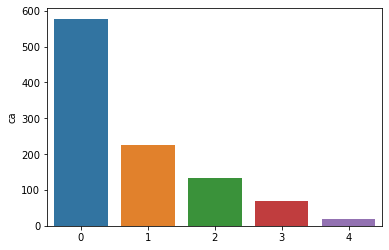

In [67]:
# Gráfica de barras del número de vasos importantes
ax = sns.barplot(ca.index, ca)

In [68]:
# 0 = normal; 1 = defecto fijo; 2 = defecto reversible (Thal)
thal = df['thal'].value_counts()
thal

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


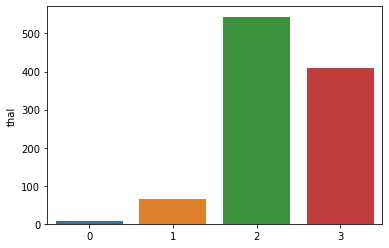

In [69]:
# Gráfica de barras de thal
ax = sns.barplot(thal.index, thal)

In [70]:
# 0 = no tiene cardiopatía; 1 = tiene cardiopatía (Target)
target = df['target'].value_counts()
target

1    526
0    499
Name: target, dtype: int64

C:\Users\abdiel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


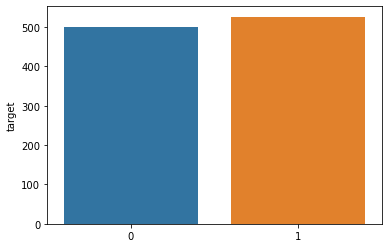

In [71]:
# Gráfica de barras de target
ax = sns.barplot(target.index, target)

#### Correlaciones

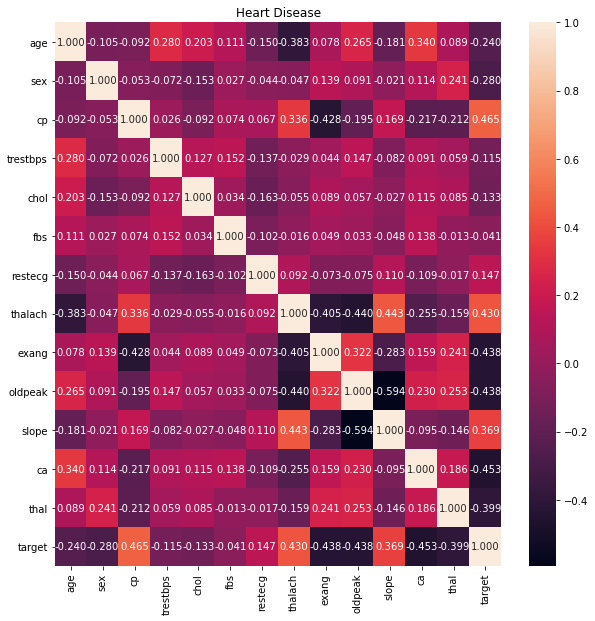

In [72]:
corr_heart = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_heart, annot = True, fmt=".3f").set_title("Heart Disease")
plt.show()

## Machine Learning

Explicar que estará basado más que nada en clasificaciones

### Estandarización de variables

In [192]:
ss = PowerTransformer()
X_scaled = ss.fit_transform(df)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

     count  mean  std   min   25%   50%   75%   max
0   1025.0   0.0  1.0 -2.50 -0.74  0.13  0.71  2.74
1   1025.0  -0.0  1.0 -1.51 -1.51  0.66  0.66  0.66
2   1025.0  -0.0  1.0 -0.99 -0.99  0.43  1.08  1.48
3   1025.0   0.0  1.0 -2.83 -0.62  0.02  0.58  2.89
4   1025.0   0.0  1.0 -3.28 -0.65 -0.01  0.66  4.01
5   1025.0   0.0  1.0 -0.42 -0.42 -0.42 -0.42  2.39
6   1025.0  -0.0  1.0 -1.02 -1.02  0.93  0.93  2.04
7   1025.0   0.0  1.0 -2.58 -0.81  0.04  0.72  2.80
8   1025.0  -0.0  1.0 -0.71 -0.71 -0.71  1.40  1.40
9   1025.0  -0.0  1.0 -1.17 -1.17  0.13  0.90  2.12
10  1025.0   0.0  1.0 -1.96 -0.71 -0.71  1.03  1.03
11  1025.0   0.0  1.0 -0.86 -0.86 -0.86  0.82  1.67
12  1025.0  -0.0  1.0 -2.77 -0.60 -0.60  1.15  1.15
13  1025.0   0.0  1.0 -1.03 -1.03  0.97  0.97  0.97


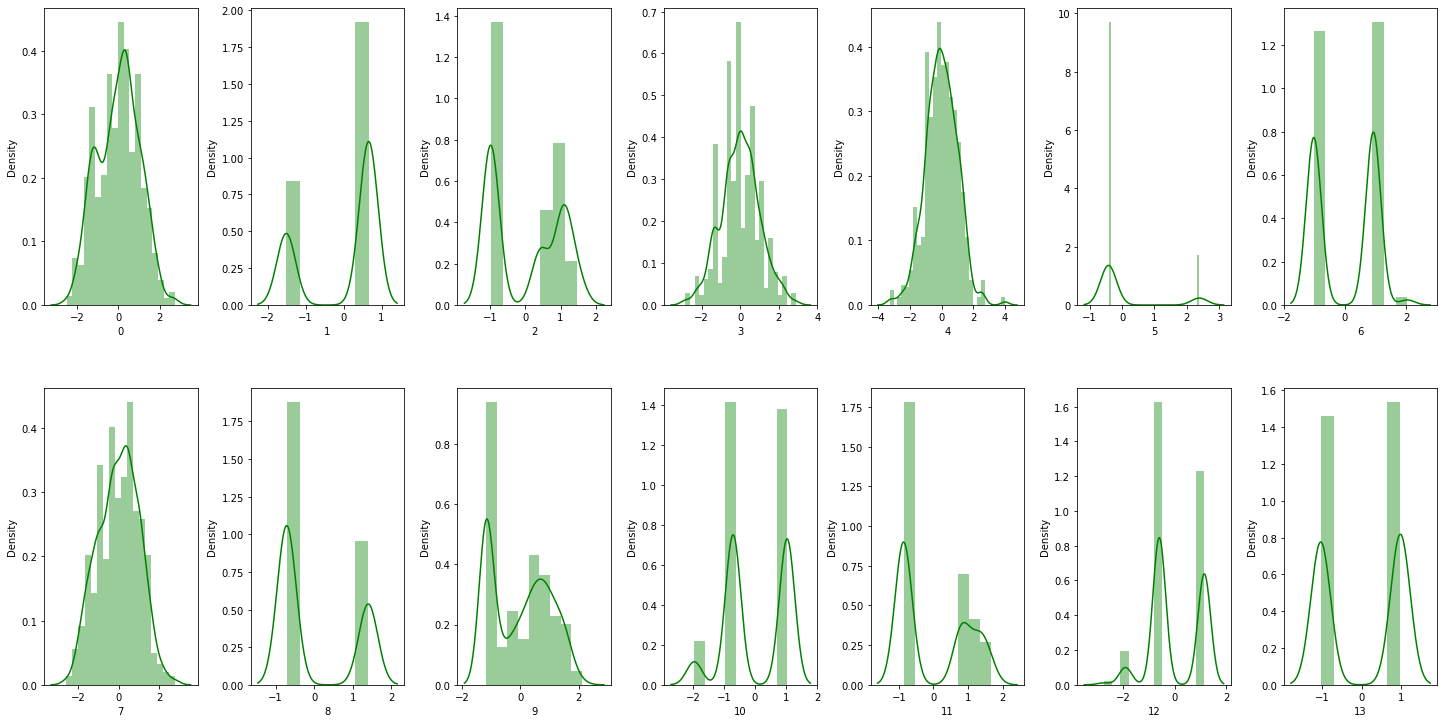

In [193]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_scaled.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

### Separación, validación y evaluación

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size = 0.4, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 615
y_train shape: 615
X_test shape:410
y_test shape:410


### Clúster por vecinos más cercanos

In [195]:
# Hiperparámetros
n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

param_grid = {"n_neighbors": n_neighbors, "weights": weights, "metric": metric}

In [196]:
KNN = KNeighborsClassifier() #Genera el modelo
KNN_cv = RandomizedSearchCV(KNN, param_grid, cv = 10)
KNN_cv.fit(X_train, y_train)   #Entrena el modelo
# y_pred_knn = KNN.predict(X_test)   #Genera la predicción

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18, 20],
                                        'weights': ['uniform', 'distance']})

In [197]:
# Hiperparámetros que generan el mejor modelo
print("K vecinos más cercanos con hiperparámetros ajustados: {}".format(KNN_cv.best_params_))

K vecinos más cercanos con hiperparámetros ajustados: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'euclidean'}


In [198]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 0.98


In [199]:
KNN = KNeighborsClassifier(weights = 'distance', n_neighbors = 8, metric = 'euclidean') #Genera el modelo
KNN.fit(X_train, y_train)   #Entrena el modelo
y_pred_knn = KNN.predict(X_test)   #Genera la predicción

In [200]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 0.98


In [203]:
y_pred_knn_curva = KNN.predict(X_test)

y_pred_knn_curva

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [204]:
y_pred_proba_knn_curva = KNN.predict_proba(X_test)

y_pred_proba_knn_curva[:10,:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [206]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn_curva[:, 1])
roc_auc = auc(fpr, tpr)

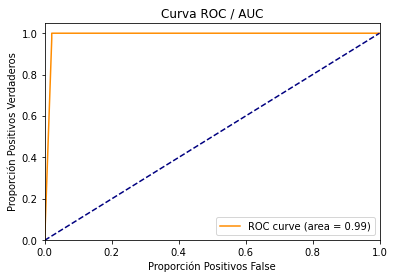

In [207]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

### Clasificador ingenuo de Bayes

In [208]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción

In [209]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [210]:
evaluar(y_test, y_pred_nb)

[[190   0]
 [  0 220]]
True positives: 220
True negatives: 190
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


In [211]:
y_pred_nb_curva = NaiveBayes.predict(X_test)

y_pred_nb_curva

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [212]:
y_pred_proba_nb_curva = NaiveBayes.predict_proba(X_test)

y_pred_proba_nb_curva[:10,:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [213]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nb_curva[:, 1])
roc_auc = auc(fpr, tpr)

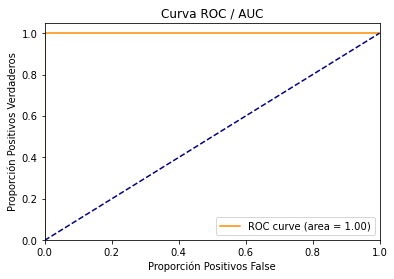

In [214]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

### Regresión

In [236]:
# Hiperparámetros
c_space = np.logspace(-5, 20, 15)
penalty = ['none', 'l1', 'l2', 'elasticnet']
param_grid = {"C": c_space, "penalty": penalty}

# Instancia del modelo
LogisticRegression = LogisticRegression()

In [237]:
# Ajusta de hiperparámetros y entrenamiento
LogisticRegression_cv = RandomizedSearchCV(LogisticRegression, param_grid, cv = 10)
LogisticRegression_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 6.10540230e-04, 3.72759372e-02, 2.27584593e+00,
       1.38949549e+02, 8.48342898e+03, 5.17947468e+05, 3.16227766e+07,
       1.93069773e+09, 1.17876863e+11, 7.19685673e+12, 4.39397056e+14,
       2.68269580e+16, 1.63789371e+18, 1.00000000e+20]),
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet']})

In [238]:
# Hiperparámetros que generan el mejor modelo
print("Regresión logística con hiperparámetros ajustados: {}".format(LogisticRegression_cv.best_params_))

Regresión logística con hiperparámetros ajustados: {'penalty': 'l2', 'C': 1930697728.8832536}


In [239]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [242]:
# Sirve en esencia para clasificaciones binarias
LogisticRegression = LogisticRegression(penalty = 'none', C = 31622776.60168379)
LogisticRegression.fit(X_train, y_train) #Entrena el modelo
y_pred_lr = LogisticRegression.predict(X_test) #Genera la predicción

In [243]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [244]:
y_pred_lr_curva = LogisticRegression.predict(X_test)

y_pred_lr_curva

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [245]:
y_pred_proba_lr_curva = LogisticRegression.predict_proba(X_test)

y_pred_proba_lr_curva[:10,:]

array([[1.57866135e-07, 9.99999842e-01],
       [2.64489419e-07, 9.99999736e-01],
       [1.61198160e-07, 9.99999839e-01],
       [8.26301166e-08, 9.99999917e-01],
       [9.99999930e-01, 7.01156036e-08],
       [9.99999985e-01, 1.48003364e-08],
       [8.21451666e-08, 9.99999918e-01],
       [5.01375023e-08, 9.99999950e-01],
       [7.89447363e-08, 9.99999921e-01],
       [6.82190491e-08, 9.99999932e-01]])

In [246]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr_curva[:, 1])
roc_auc = auc(fpr, tpr)

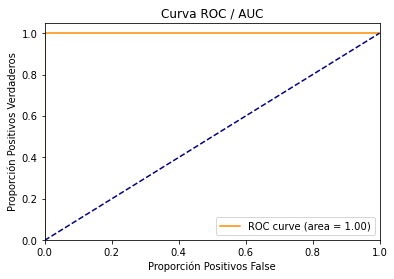

In [247]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

### Máquina de soporte vectorial

In [284]:
# Hiperparámetros
param_grid = {'C': np.logspace(-5, 10, 15), 'gamma':[0.01, 0.1, 1, 10]}

# Instancia del modelo
from sklearn.svm import SVC
SVC = SVC()

In [285]:
# Ajusta de hiperparámetros y entrenamiento
SVC_cv = RandomizedSearchCV(SVC, param_grid, cv = 10)
SVC_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': array([1.00000000e-05, 1.17876863e-04, 1.38949549e-03, 1.63789371e-02,
       1.93069773e-01, 2.27584593e+00, 2.68269580e+01, 3.16227766e+02,
       3.72759372e+03, 4.39397056e+04, 5.17947468e+05, 6.10540230e+06,
       7.19685673e+07, 8.48342898e+08, 1.00000000e+10]),
                                        'gamma': [0.01, 0.1, 1, 10]})

In [286]:
# Hiperparámetros que generan el mejor modelo
print("Máquina de soporte vectorial con hiperparámetros ajustados: {}".format(SVC_cv.best_params_))

Máquina de soporte vectorial con hiperparámetros ajustados: {'gamma': 0.1, 'C': 2.2758459260747865}


In [287]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [290]:
SVC = SVC(gamma = 0.1, C = 43939.70560760786)
SVC.fit(X_train, y_train) #Entrena el modelo
y_pred_svc = SVC.predict(X_test) #Genera la predición

In [291]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [292]:
evaluar(y_test, y_pred_svc)

[[190   0]
 [  0 220]]
True positives: 220
True negatives: 190
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


In [297]:
y_pred_svc_curva = SVC.predict(X_test)

y_pred_svc_curva

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [298]:
y_pred_proba_svc_curva = SVC.predict_proba(X_test)

y_pred_proba_svc_curva[:10,:]

AttributeError: predict_proba is not available when  probability=False

In [299]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svc_curva[:, 1])
roc_auc = auc(fpr, tpr)

NameError: name 'y_pred_proba_svc_curva' is not defined

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

### Bosque aleatorio

In [262]:
# Hiperparámetros
n_estimators = [int(n) for n in np.linspace(100, 1000, 5)]
max_depth = [int(d) for d in np.linspace(10, 50, 2)]
max_features = ["sqrt", "log2"]
criterion = ["gini", "entropy"]

param_grid = {"n_estimators": n_estimators,
         "max_depth": max_depth,
        "max_features": max_features,
        "criterion": criterion}

# Instancia del modelo
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [263]:
# Ajusta de hiperparámetros y entrenamiento
RFC_cv = RandomizedSearchCV(RFC, param_grid, cv = 10)
RFC_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]})

In [264]:
# Hiperparámetros que generan el mejor modelo
print("Bosque aleatorio con hiperparámetros ajustados: {}".format(RFC_cv.best_params_))

Bosque aleatorio con hiperparámetros ajustados: {'n_estimators': 775, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini'}


In [265]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [266]:
RFC = RandomForestClassifier(n_estimators = 325, max_features = 'log2', max_depth = 10, criterion = 'entropy')
RFC.fit(X_train, y_train) #Entrena el modelo
y_pred_rfc = RFC.predict(X_test) #Genera la predicción

In [267]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [268]:
evaluar(y_test, y_pred_rfc)

[[190   0]
 [  0 220]]
True positives: 220
True negatives: 190
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


In [269]:
y_pred_rfc_curva = RFC.predict(X_test)

y_pred_rfc_curva

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [270]:
y_pred_proba_rfc_curva = RFC.predict_proba(X_test)

y_pred_proba_rfc_curva[:10,:]

array([[0.06001465, 0.93998535],
       [0.02461538, 0.97538462],
       [0.01274725, 0.98725275],
       [0.        , 1.        ],
       [0.96615385, 0.03384615],
       [1.        , 0.        ],
       [0.03323077, 0.96676923],
       [0.00307692, 0.99692308],
       [0.04      , 0.96      ],
       [0.07428571, 0.92571429]])

In [271]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rfc_curva[:, 1])
roc_auc = auc(fpr, tpr)

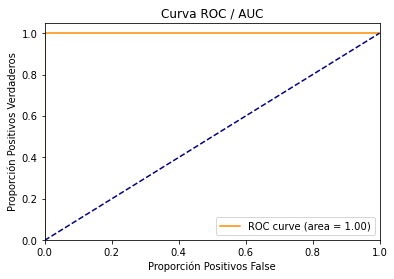

In [272]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

### Red neuronal

In [273]:
# Hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(10,30,10), (20,), (3,2,1)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}

# Instancia del modelo
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier()

In [274]:
# Ajusta de hiperparámetros y entrenamiento
ANN_cv = RandomizedSearchCV(ANN, param_grid, cv = 10)
ANN_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=MLPClassifier(),
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(10, 30, 10),
                                                               (20,),
                                                               (3, 2, 1)]})

In [275]:
# Hiperparámetros que generan el mejor modelo
print("Máquina de soporte vectorial con hiperparámetros ajustados: {}".format(ANN_cv.best_params_))

Máquina de soporte vectorial con hiperparámetros ajustados: {'hidden_layer_sizes': (10, 30, 10), 'alpha': 0.01, 'activation': 'logistic'}


In [276]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [277]:
ANN = MLPClassifier(hidden_layer_sizes = (10, 30, 10), alpha = 0.1, activation = 'relu')
ANN.fit(X_train, y_train)
y_pred_ann = ANN.predict(X_test)

In [278]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 1.0


In [279]:
evaluar(y_test, y_pred_ann)

[[190   0]
 [  0 220]]
True positives: 220
True negatives: 190
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


In [280]:
y_pred_ann_curva = ANN.predict(X_test)

y_pred_ann_curva

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [281]:
y_pred_proba_ann_curva = ANN.predict_proba(X_test)

y_pred_proba_ann_curva[:10,:]

array([[2.15262718e-03, 9.97847373e-01],
       [2.61803462e-03, 9.97381965e-01],
       [4.51174275e-03, 9.95488257e-01],
       [9.33737338e-03, 9.90662627e-01],
       [9.99775363e-01, 2.24636611e-04],
       [9.99896973e-01, 1.03026899e-04],
       [4.53770699e-04, 9.99546229e-01],
       [3.68417635e-04, 9.99631582e-01],
       [3.36218079e-04, 9.99663782e-01],
       [2.35590125e-04, 9.99764410e-01]])

In [282]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ann_curva[:, 1])
roc_auc = auc(fpr, tpr)

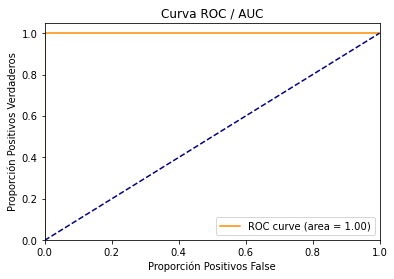

In [283]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

## Elementos del Checkpoint

### ¿Qué incluye este proyecto?

#### Sesión 01
Definición de un proyecto de Machine Learning

#### Sesión 02
Creación de módulo de separación, evaluación y validación de algoritmos de Machine Learning

#### Sesión 03
Se construyó un algoritmo de Machine Learning No-supervisado que resuelva un problema específico.

#### Sesión 05
La construcción de un algoritmo de Machine Learning de árboles de decisión para clasificación.

#### Sesión 06
La construcción de un algoritmo basado en Redes Neuronales Artificiales que permita realizar clasificaciones.

#### Sesión 07
La construcción de varios algoritmos de clasificación basados en Machine Learning, y mostrar cuál es el mejor con base en evidencia sólida.